In [1]:
# importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the dataset
data = pd.read_csv('combined_dataset.csv')

In [3]:
# top 5 rows of the dataset
data.head()

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,www.voting-yahoo.com,10000000,0,0,0,20,0,0,1,20,2,1
1,www.zvon.org/xxl/WSDL1.1/Output/index.html,194914,0,1,7305,42,0,0,0,12,2,0
2,tecportais.com/file-security-update-infonfmati...,10000000,0,0,0,155,0,0,0,14,1,1
3,bima.astro.umd.edu/nemo/linuxastro/,7001,0,0,0,35,0,0,0,18,3,0
4,huarui-tec.com/js/?us.battle.net/login/en/?ref...,10000000,0,1,730,79,0,0,1,14,1,1


### 1.  Exploratory Data Analysis

#### 1.1 Bivariate Analysis to explore feature-feature correlation among continuous features

<AxesSubplot:>

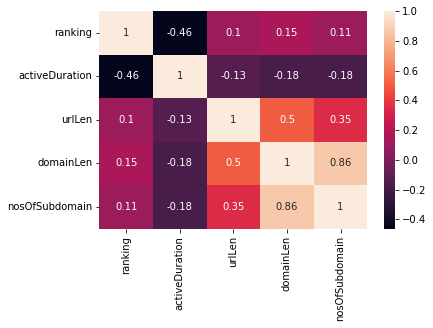

In [4]:
# heatmap
sns.heatmap(data[['ranking', 'activeDuration', 'urlLen', 'domainLen', 'nosOfSubdomain']].corr(), annot = True)

Here, domainLen and nosOfSubdomain are highly correlated with each other resulting in multi-collinearity among which domainLen is to be dropped because noOfSubdomain has weaker correlations with other features

In [5]:
# dropping the feature, domainLen
data.drop('domainLen', axis = 1, inplace = True)

#### 1.2 Bivariate Analysis to explore feature-label relationship for continuous features

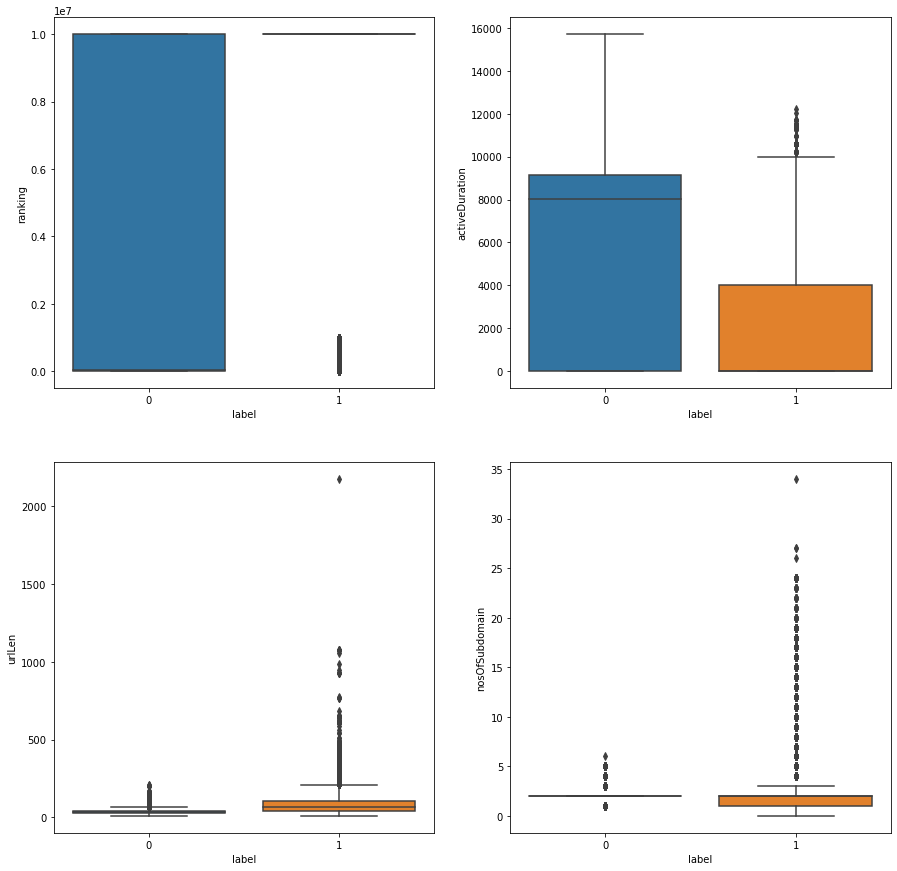

In [6]:
# box-plot
plt.figure(figsize = (15, 15))
plt.subplot(2, 2, 1)
sns.boxplot(x = 'label', y = 'ranking', data = data)
plt.subplot(2, 2, 2)
sns.boxplot(x = 'label', y = 'activeDuration', data = data)
plt.subplot(2, 2, 3)
sns.boxplot(x = 'label', y = 'urlLen', data = data)
plt.subplot(2, 2, 4)
sns.boxplot(x = 'label', y = 'nosOfSubdomain', data = data)
plt.show()

1. Mostly Phished Links or Spam Links have very high ranks (ranking behind) but there are some exceptional pretentious links that may have very good web-page ranks and are the most misleading & dangerous.
2. Phished Links very rarely have an active duration of greater than 10,000.
3. Phished Links can have very long urls, with lengths exceeding 250 characters (though rarely).
4. Legitimate Links mostly have 2 sub-domains but there may be exceptions of 1 or within the range of 2-6. On the other hand, Phished Links have a higher possibility to have more than 2 sub-domains and even though rarely, some of them have even more than 6-35 sub-domains.

#### 1.3 Checking for missing values

In [7]:
data.isnull().sum(axis = 0)

domain            0
ranking           0
isIp              0
valid             0
activeDuration    0
urlLen            0
is@               0
isredirect        0
haveDash          0
nosOfSubdomain    0
label             0
dtype: int64

### 2. Application of Data Mining Algorithms

In [8]:
# getting all the features in X and target label in y
X = data.iloc[:, 1:-1]
y = data['label']

In [9]:
# train-test-split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1234)

In [10]:
# feature scaling
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 2.1 k-Nearest Neighbor (kNN)

In [11]:
# kNN Model Training using Grid Search for hyper-parameter tuning
knn_model = KNeighborsClassifier()
params = {'n_neighbors' : [2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid_search = GridSearchCV(knn_model, param_grid = params, cv = 5, verbose = 3).fit(X_train_scaled, y_train)

print('Best Hyper-parameter:', grid_search.best_params_)
n_neighbors = grid_search.best_params_['n_neighbors']

knn_model = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .....................n_neighbors=2;, score=0.906 total time=   5.3s
[CV 2/5] END .....................n_neighbors=2;, score=0.908 total time=   5.4s
[CV 3/5] END .....................n_neighbors=2;, score=0.907 total time=   5.3s
[CV 4/5] END .....................n_neighbors=2;, score=0.908 total time=   5.3s
[CV 5/5] END .....................n_neighbors=2;, score=0.902 total time=   5.6s
[CV 1/5] END .....................n_neighbors=3;, score=0.916 total time=   5.6s
[CV 2/5] END .....................n_neighbors=3;, score=0.921 total time=   5.5s
[CV 3/5] END .....................n_neighbors=3;, score=0.919 total time=   6.1s
[CV 4/5] END .....................n_neighbors=3;, score=0.920 total time=   5.8s
[CV 5/5] END .....................n_neighbors=3;, score=0.922 total time=   5.7s
[CV 1/5] END .....................n_neighbors=4;, score=0.912 total time=   5.6s
[CV 2/5] END .....................n_neighbors=4;,

Performance Analysis of the Trained kNN Model ...

Test Accuracy:  0.9213862707481858
Test AUC:  0.9722817007108951
Testing Precision:  0.9234650967199327
Testing Recall:  0.9432314410480349
Testing F1-Score:  0.9332436165315011
Testing Confusion Matrix: 
[[ 8917  1092]
 [  793 13176]]




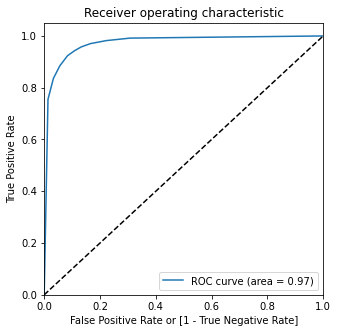

In [12]:
# getting the test predictions, test probabilities and test auc score
y_test_pred = knn_model.predict(X_test_scaled)
y_test_prob = knn_model.predict_proba(X_test_scaled)

test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob[:,1])
roc_auc = metrics.auc(fpr, tpr)

test_auc = roc_auc


# getting the Test Accuracy and Test AUC Score
print("Test Accuracy: ", test_accuracy)
print("Test AUC: ", test_auc)

# Getting the Test Precicion, Recall, F1-Score and Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_test_pred)
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1 = (2*precision*recall)/(precision+recall)

print('Testing Precision: ', precision)
print('Testing Recall: ', recall)
print('Testing F1-Score: ', f1)
print('Testing Confusion Matrix: ')
print(cm)
print('\n')


# displaying the ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob[:,1],
                                         drop_intermediate = False)
auc_score = metrics.roc_auc_score(y_test, y_test_prob[:,1])
plt.figure(figsize=(5, 5))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### 2.2 Logistic Regression

In [13]:
# Logistic Regression training using hyper-parameter tuning
lr_model = LogisticRegression()
params = {'C': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(lr_model, param_grid = params, cv = 5, verbose = 3).fit(X_train_scaled, y_train)

print('Best Hyperparameter:', grid_search.best_params_)
best_C = grid_search.best_params_['C']

lr_model = LogisticRegression(C = best_C).fit(X_train_scaled, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ............................C=0.01;, score=0.875 total time=   0.0s
[CV 2/5] END ............................C=0.01;, score=0.877 total time=   0.0s
[CV 3/5] END ............................C=0.01;, score=0.876 total time=   0.0s
[CV 4/5] END ............................C=0.01;, score=0.872 total time=   0.0s
[CV 5/5] END ............................C=0.01;, score=0.878 total time=   0.0s
[CV 1/5] END .............................C=0.1;, score=0.875 total time=   0.0s
[CV 2/5] END .............................C=0.1;, score=0.875 total time=   0.0s
[CV 3/5] END .............................C=0.1;, score=0.875 total time=   0.0s
[CV 4/5] END .............................C=0.1;, score=0.871 total time=   0.0s
[CV 5/5] END .............................C=0.1;, score=0.877 total time=   0.0s
[CV 1/5] END ...............................C=1;, score=0.875 total time=   0.0s
[CV 2/5] END ...............................C=1;,

Performance Analysis of the Trained Logistic Regression Model ...

Test Accuracy:  0.8743014429894069
Test AUC:  0.9388948471681522
Testing Precision:  0.8830687460661585
Testing Recall:  0.9039301310043668
Testing F1-Score:  0.893377670864582
Testing Confusion Matrix: 
[[ 8337  1672]
 [ 1342 12627]]




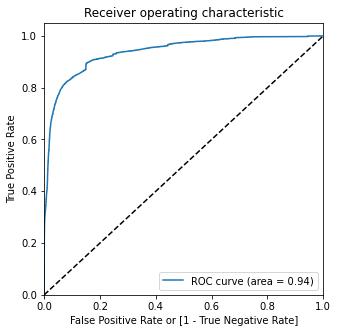

In [14]:
# getting the test predictions, test probabilities and test auc score
y_test_pred = lr_model.predict(X_test_scaled)
y_test_prob = lr_model.predict_proba(X_test_scaled)

test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob[:,1])
roc_auc = metrics.auc(fpr, tpr)

test_auc = roc_auc


# getting the Test Accuracy and Test AUC Score
print("Test Accuracy: ", test_accuracy)
print("Test AUC: ", test_auc)

# Getting the Test Precicion, Recall, F1-Score and Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_test_pred)
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1 = (2*precision*recall)/(precision+recall)

print('Testing Precision: ', precision)
print('Testing Recall: ', recall)
print('Testing F1-Score: ', f1)
print('Testing Confusion Matrix: ')
print(cm)
print('\n')


# displaying the ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob[:,1],
                                         drop_intermediate = False)
auc_score = metrics.roc_auc_score(y_test, y_test_prob[:,1])
plt.figure(figsize=(5, 5))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [15]:
# feature coefficients given by the model
pd.DataFrame({'features':list(X.columns), 'coefficients':list(lr_model.coef_[0])})

,features,coefficients
0,ranking,0.735823
1,isIp,0.103866
2,valid,1.513253
3,activeDuration,-2.405516
4,urlLen,2.873462
5,is@,0.096365
6,isredirect,0.339532
7,haveDash,0.245113
8,nosOfSubdomain,-0.605135


1. The higher the page rank (numerically) of a website is, the higher are the chances of the link to be a phished one.
2. If there is an IP address in the weblink, most probably the link is a phished/spam link.
3. If the current status of URL registration is valid, it is highly probable that the weblink is phished.
4. Lower the active duration of the URL, higher is the probability that the weblink is phished.
5. Higher the length of the URL, higher is the probability that the website is a phished one.
6. If the link has '@' character, there are chances that the website is phished or is a spam link.
7. If the link is a redirect, there are chances that the weblink is a spam or phished one.
8. If there are dashes present in the domain name, the website link is likely to be phished.
9. Lower the number of sub-domains of a website, higher are the chances of the weblink to be phished or spam.

#### 2.3 Support Vector Machine

In [16]:
# Gradient Boosting Classifier training using Grid Search for hyper-parameter tuning
svc_model = SVC(random_state = 1234)
params = {'C' : [0.1, 1, 10], 'kernel' : ['linear', 'rbf']}

grid_search = GridSearchCV(svc_model, param_grid = params, cv = 5, verbose = 3).fit(X_train_scaled, y_train)

print('Best Hyperparameter(s):', grid_search.best_params_)
C = grid_search.best_params_['C']
kernel = grid_search.best_params_['kernel']

svc_model = SVC(C = C, 
                kernel = kernel, 
                random_state = 1234,
                probability = True).fit(X_train_scaled, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.881 total time=  35.1s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.883 total time=  37.9s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.883 total time=  38.7s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.879 total time=  40.1s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.883 total time=  36.6s
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.893 total time=  50.1s
[CV 2/5] END .................C=0.1, kernel=rbf;, score=0.896 total time=  49.0s
[CV 3/5] END .................C=0.1, kernel=rbf;, score=0.895 total time=  47.8s
[CV 4/5] END .................C=0.1, kernel=rbf;, score=0.892 total time=  48.5s
[CV 5/5] END .................C=0.1, kernel=rbf;, score=0.896 total time=  48.1s
[CV 1/5] END ................C=1, kernel=linear;, score=0.882 total time=  49.0s
[CV 2/5] END ................C=1, kernel=linear;,

Performance Analysis of the Trained SVC Model ...

Test Accuracy:  0.9033697556093085
Test AUC:  0.9595325693024178
Testing Precision:  0.9084981068573833
Testing Recall:  0.9275538692819816
Testing F1-Score:  0.9179271014133401
Testing Confusion Matrix: 
[[ 8704  1305]
 [ 1012 12957]]




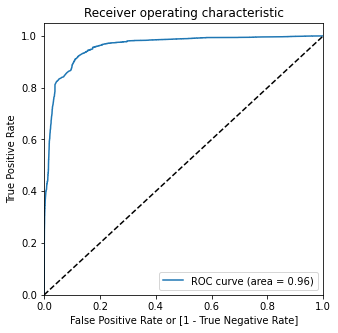

In [17]:
# getting the test predictions, test probabilities and test auc score
y_test_pred = svc_model.predict(X_test_scaled)
y_test_prob = svc_model.predict_proba(X_test_scaled)

test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob[:,1])
roc_auc = metrics.auc(fpr, tpr)

test_auc = roc_auc


# getting the Test Accuracy and Test AUC Score
print("Test Accuracy: ", test_accuracy)
print("Test AUC: ", test_auc)

# Getting the Test Precicion, Recall, F1-Score and Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_test_pred)
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1 = (2*precision*recall)/(precision+recall)

print('Testing Precision: ', precision)
print('Testing Recall: ', recall)
print('Testing F1-Score: ', f1)
print('Testing Confusion Matrix: ')
print(cm)
print('\n')


# displaying the ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob[:,1],
                                         drop_intermediate = False)
auc_score = metrics.roc_auc_score(y_test, y_test_prob[:,1])
plt.figure(figsize=(5, 5))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()